# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the Data - Mall customer

In [2]:
dataset = pd.read_csv("C:/Users/Sony/Desktop/Data-Science-Training/6. Clustering/Mall_Customers.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# for 2D visualization of cluster, we are only taking 2 columns
cluster_2col = dataset.iloc[ : , 3:5].values

## To determine the cluster
### We need to create an Elbow Matric or Elbow Method

In [6]:
from sklearn.cluster import KMeans

In [24]:
wcss = []

In [25]:
wcss

[]

In [26]:
for i in range(1, 11):
    kmeanCluster_1 = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeanCluster_1.fit(cluster_2col)
    wcss.append(kmeanCluster_1.inertia_)


In [27]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37239.83554245604,
 30273.394312070042,
 25018.576334776335,
 21850.165282585633,
 19664.685196005543]

#### plot the Elbow Mthod

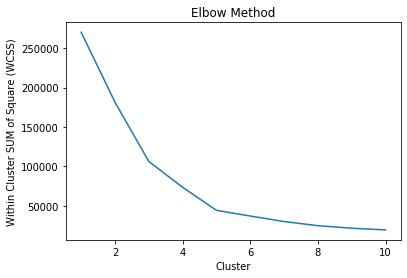

In [28]:
plt.plot(range(1,11), wcss)
plt.xlabel("Cluster")
plt.ylabel("Within Cluster SUM of Square (WCSS)")
plt.title("Elbow Method")
plt.show()

By looking at the Elbow Method, the optimal cluster is at 5

In [ ]:
# Create K mean cluster using 5 cluster

In [29]:
kmeanCluster = KMeans(n_clusters=5, init='k-means++', random_state=0)

#### Train my data

In [30]:
kmeanCluster.fit(cluster_2col)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [31]:
cluster = kmeanCluster.predict(cluster_2col)

In [32]:
pd.DataFrame(cluster).head()

0
0  3
1  1
2  3
3  1
4  3

In [33]:
cluster

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

# Visualize the Cluster

In [13]:
cluster_2col.shape

(200, 2)

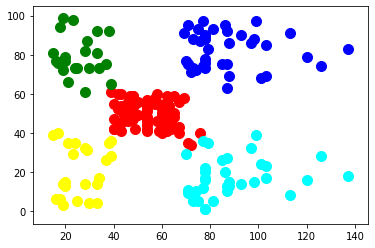

In [34]:
plt.scatter(cluster_2col[cluster == 0, 0 ], cluster_2col[cluster == 0, 1], s= 100, c = 'red', label = 'Cluster 1')
plt.scatter(cluster_2col[cluster == 1, 0 ], cluster_2col[cluster == 1, 1], s= 100, c = 'green', label = 'Cluster 2')
plt.scatter(cluster_2col[cluster == 2, 0 ], cluster_2col[cluster == 2, 1], s= 100, c = 'blue', label = 'Cluster 3')
plt.scatter(cluster_2col[cluster == 3, 0 ], cluster_2col[cluster == 3, 1], s= 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(cluster_2col[cluster == 4, 0 ], cluster_2col[cluster == 4, 1], s= 100, c = 'cyan', label = 'Cluster 5')


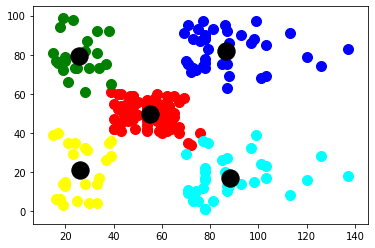

In [35]:
plt.scatter(cluster_2col[cluster == 0, 0 ], cluster_2col[cluster == 0, 1], s= 100, c = 'red', label = 'Cluster 1')
plt.scatter(cluster_2col[cluster == 1, 0 ], cluster_2col[cluster == 1, 1], s= 100, c = 'green', label = 'Cluster 2')
plt.scatter(cluster_2col[cluster == 2, 0 ], cluster_2col[cluster == 2, 1], s= 100, c = 'blue', label = 'Cluster 3')
plt.scatter(cluster_2col[cluster == 3, 0 ], cluster_2col[cluster == 3, 1], s= 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(cluster_2col[cluster == 4, 0 ], cluster_2col[cluster == 4, 1], s= 100, c = 'cyan', label = 'Cluster 5')
plt.scatter(kmeanCluster.cluster_centers_[:, 0], kmeanCluster.cluster_centers_[:,1], s = 300, c='black', label = 'Centroids')


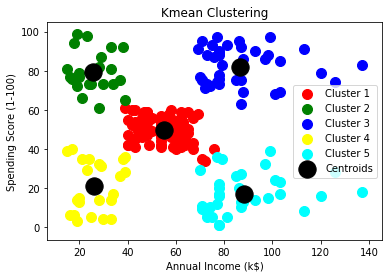

In [36]:
plt.scatter(cluster_2col[cluster == 0, 0 ], cluster_2col[cluster == 0, 1], s= 100, c = 'red', label = 'Cluster 1')
plt.scatter(cluster_2col[cluster == 1, 0 ], cluster_2col[cluster == 1, 1], s= 100, c = 'green', label = 'Cluster 2')
plt.scatter(cluster_2col[cluster == 2, 0 ], cluster_2col[cluster == 2, 1], s= 100, c = 'blue', label = 'Cluster 3')
plt.scatter(cluster_2col[cluster == 3, 0 ], cluster_2col[cluster == 3, 1], s= 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(cluster_2col[cluster == 4, 0 ], cluster_2col[cluster == 4, 1], s= 100, c = 'cyan', label = 'Cluster 5')

plt.scatter(kmeanCluster.cluster_centers_[:, 0], kmeanCluster.cluster_centers_[:,1], s = 300, c='black', label = 'Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.title("Kmean Clustering")
plt.show()

In [20]:
within_cluster_sum_square = kmeanCluster.inertia_
within_cluster_sum_square

106348.37306211118

In [37]:
dataset.head()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

# Add the cluster to original Dataset

In [38]:
dataset['Cluster'] = cluster

In [39]:
dataset.head()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        3  
1        1  
2        3  
3        1  
4        3

In [40]:
dataset.to_csv("KMean_Cluster_data.csv")